In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import ttest_rel




In [2]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [3]:
alternate_color = False
simple_minerva_label = True


key ="MINERVA_grid_thomas"#"MINERVA_grid_t2d_calibrate"
subfile = ""
select_columns_bool = False
shortened_shortened = False
trans_vec = False
add_linmodel_type = False




if "calibrate" in key:
    numPc = [0,1,2,3,4,5,6,7,8,9]

    if "t2d" in key:
        
        phen = ["bin_t2d"  for i in range(len(numPc))]
        phen_pretty = "Type II diabetes status"
        folder_names = ["T2D_k7" for i in range(0,len(numPc))]
        limit_spec =(0.4,0.9)
        
    elif "gibbons" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Gibbons et al.)"
        folder_names = ["CRC_k7" for i in range(0,len(numPc))]
        limit_spec =(0.5,1)
        
    elif "thomas" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Thomas et al.)"
        folder_names = ["Thomas_k7" for i in range(0,len(numPc))]
        limit_spec =(0.5,0.9)
       
    
    
    elif "agp_bmi" in key:
        phen = ["bmi_corrected"  for i in range(len(numPc))]
        phen_pretty = "body mass index"
        folder_names = ["AGP_max_k5" for i in range(0,len(numPc))]
        limit_spec =(-0.12,0.35)
        
    if any(x in key for x in ["t2d","gibbons","thomas"]):
        metric_word = "auc_all"
        chosen_classifier = "Random Forest"
        title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
        phen_type = "class"
    elif "bmi" in key:
        metric_word = "pearson"
        chosen_classifier = ""
        title = 'Pearson for prediction of ' + phen_pretty #' #AUC for prediction of antibiotic history' #
        phen_type = "pred"
     
    select_columns_bool = True
    if simple_minerva_label:
        select_labels = numPc #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
   
    else:
        select_labels = numPc#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    file_names =['MINERVA_grid_PC' + str(numPc[i]) for i in range(0,len(numPc))]
    
    pair_test_all = False
    shortened=True
    not_rotate=True
    trans_vec = False
    trans = "clr_scale"
else:
    numPc = [0,0,0,0,0] 

    if "t2d" in key:
        
        phen = ["bin_t2d"  for i in range(len(numPc))]
        phen_pretty = "Type II diabetes status"
        folder_names = ["T2D_k6","T2D_k6","T2D_k6","T2D_k6","T2D_k7"]
        limit_spec =(0.4,1)
        
    elif "gibbons" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Gibbons et al.)"
        folder_names = ["CRC_k7" for i in range(0,len(numPc))]
        limit_spec =(0.5,1)

        
    elif "thomas" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Thomas et al.)"
        folder_names = ["Thomas_k7","Thomas_k6","Thomas_k6","Thomas_k6","Thomas_k7"]
        limit_spec =(0.5,0.9)
       
    
    
    elif "agp_bmi" in key:
        phen = ["bmi_corrected"  for i in range(len(numPc))]
        phen_pretty = "body mass index"
        folder_names = ["AGP_max_k5","AGP_max_k5","AGP_max_k5","AGP_max_k5","AGP_max_k5"]
        limit_spec =(0,0.35)
        
    if any(x in key for x in ["t2d","gibbons","thomas"]):
        metric_word = "auc_all"
        chosen_classifier = "Random Forest"
        title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
        phen_type = "class"
    elif "bmi" in key:
        metric_word = "pearson"
        chosen_classifier = ""
        title = 'Pearson for prediction of ' + phen_pretty #' #AUC for prediction of antibiotic history' #
        phen_type = "pred"
     
    select_columns_bool = True
    if simple_minerva_label:
        select_labels = ["Raw","ComBat","limma","BMC","MINERVA"] #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
   
    else:
        select_labels = ["Raw","ComBat","limma","BMC","MINERVA"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    
    file_names = ['raw_grid','ComBat_grid','limma_grid','bmc_grid','MINERVA_grid'] 
    
    pair_test_all = False
    shortened=True
    not_rotate=False
    trans_vec = True
    trans = ["none","none","none","none","clr_scale"]
    
lin_model = "reg"
if not trans_vec:
    trans = ["clr_scale" for i in range(len(file_names))]
data_type = "kmer"

file_names = [file_names[f] + "_trans_" + trans[f] for f in range(len(file_names))]
nice_names = ["7" + '-mer' for i in range(len(numPc))]

if phen_type == "cont":
    
    metric_word = 'pearson' # 'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bmi_prediction' #'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier = 'Regression'# "Random Forest"##"Random Forest"#'Regression'#"Random Forest"
    classifier_ofc = "Lin"
    title = 'Pearson correlation of ' + phen_pretty# 'AUC for prediction of antibiotic history'#'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 
else:
    #'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier_ofc = "Mixed"
    classifier = [chosen_classifier for f in file_names]#"Naive Bayes"#""Naive Bayes"#Random Forest"#Random Forest"#"#'Regression'#"Random Forest"

    #title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 

 

In [4]:
df_metric = pd.DataFrame()

In [5]:
phen

['bin_crc_normal',
 'bin_crc_normal',
 'bin_crc_normal',
 'bin_crc_normal',
 'bin_crc_normal']

In [6]:

for f in range(len(file_names)):
    
    if metric_word == 'pearson':
        if add_linmodel_type:
            
            filename_temp = data_folder + folder_names[f] +"/" + subfile + data_type + "_BatchCorrected_" + phen[f] + "_"+ file_names[f] + "_lin_model_" + lin_model +"_pearson_and_mse.pkl"
        
        else:
            # "_lin_model_" + lin_model +
            filename_temp = data_folder + folder_names[f] +"/" + subfile + data_type + "_BatchCorrected_" + phen[f] + "_"+ file_names[f] + "_pearson_and_mse.pkl"
        
    else:
        
        filename_temp = data_folder + folder_names[f] + "/" +subfile + data_type + "_BatchCorrected_"+ phen[f] + "_" + file_names[f] + "_classification_auc.pkl"
    print(filename_temp)
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()]) 
        
        if metric_word == "auc_all" or metric_word == "accuracy":
            index = folder_names[f] + file_names[f]
            #index = folder_names[f]
            #index = nice_names[f] + "_first_" + str(numPc[f])
            
            df_metric[index] = pd.Series(data_temp[file_names[f]][classifier[f]][metric_word])
            #nice_names[f] + "_first_" + str(numPc[f])
        else:
            #index = folder_names[f] + file_names[f]
            index = file_names[f]
            df_metric[index] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        print(file_names[f])
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/Thomas_k7/kmer_BatchCorrected_bin_crc_normal_raw_grid_trans_none_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/Thomas_k6/kmer_BatchCorrected_bin_crc_normal_ComBat_grid_trans_none_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/Thomas_k6/kmer_BatchCorrected_bin_crc_normal_limma_grid_trans_none_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/Thomas_k6/kmer_BatchCorrected_bin_crc_normal_bmc_grid_trans_none_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/Thomas_k7/kmer_BatchCorrected_bin_crc_normal_MINERVA_grid_trans_clr_scale_classification_auc.pkl


In [7]:
import numpy as np
import scipy
#delta = np.array(df_metric.iloc[:,4]-df_metric.iloc[:,0])
#print(np.mean(delta))
#print(scipy.stats.sem(delta))


In [8]:
df_metric

,Thomas_k7raw_grid_trans_none,Thomas_k6ComBat_grid_trans_none,Thomas_k6limma_grid_trans_none,Thomas_k6bmc_grid_trans_none,Thomas_k7MINERVA_grid_trans_clr_scale
0,0.646897,0.670335,0.675396,0.681118,0.705106
1,0.711048,0.688600,0.686180,0.686840,0.745158
2,0.631027,0.653571,0.661607,0.656027,0.667634
3,0.693878,0.675283,0.704082,0.708617,0.664399
4,0.655782,0.686168,0.680499,0.691383,0.640136
5,0.625000,0.677817,0.670114,0.681558,0.630062
6,0.632042,0.726232,0.731514,0.719520,0.679577
7,0.608147,0.584598,0.588839,0.581473,0.633482
8,0.706009,0.673696,0.670522,0.670748,0.704082
9,0.648753,0.686168,0.677324,0.681633,0.650794


In [9]:
df_metric.sum(axis=1)
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

0     3.378851
1     3.517826
2     3.269866
3     3.446259
4     3.353968
5     3.284551
6     3.488886
7     2.996540
8     3.425057
9     3.344671
10    3.219630
11    3.015625
12    3.597768
13    3.527211
14    3.168934
15    3.281910
16    3.309859
17    3.420312
18    3.299773
19    3.525057
20    3.188160
21    3.270246
22    3.440625
23    3.205669
24    3.269388
25    3.273988
26    3.375220
27    3.196875
28    3.181633
29    3.533787
30    3.523658
31    3.205106
32    3.384375
33    3.409977
34    3.197732
35    3.273548
36    3.163292
37    3.445982
38    3.483447
39    3.439456
40    3.342210
41    3.258583
42    3.737054
43    3.042177
44    3.190816
45    2.959727
46    3.284771
47    3.557812
48    3.359297
49    3.372562
dtype: float64

In [10]:
file_names

['raw_grid_trans_none',
 'ComBat_grid_trans_none',
 'limma_grid_trans_none',
 'bmc_grid_trans_none',
 'MINERVA_grid_trans_clr_scale']

In [11]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
#select_labels = ["raw","ComBat","BMC","limma","SmartSVA","Refactor","MINERVA"]
#select_labels = numPc
#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

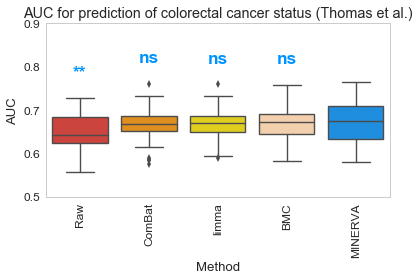

In [21]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only




# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
sns.set_style("whitegrid")
if select_columns_bool:
    
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    if not_rotate:
        
        current_palette = sns.color_palette()
        #sns.palplot(current_palette)
        #palette = sns.cubehelix_palette(df_metric.shape[1])
        palette = sns.color_palette("Blues", df_metric.shape[1])
        plot_color = ["#ABB2B9"] + palette.as_hex()[1:]
        
        
        
        g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
        g.set_xticklabels(labels = select_labels) #df_metric.columns
    else:
        
        
        current_palette = sns.color_palette()
        #sns.palplot(current_palette)
        #palette = sns.cubehelix_palette(df_metric.shape[1])
        if not alternate_color:
            #palette = sns.color_palette("Reds", df_metric.shape[1]-1)
            #plot_color = palette.as_hex()[::-1] + ["#0093FF"]#["#01d3e8"]
            
            #palette = sns.color_palette("Reds", 2)
            #reds_color = palette.as_hex()[1:2]
            
            #palette = sns.color_palette("Oranges", df_metric.shape[1]-2)
            #oranges_color = palette.as_hex()
            
            #plot_color = reds_color + oranges_color +["#0093FF"]
            
            #plot_color['#808B96','#F2F4F4',]
            plot_color =['#e32f27','#FF9300','#FFE800','#fdd0a2',"#0093FF"]
        else:
            palette1 = sns.color_palette("Reds", 2) [::-1] 
            palette2 = sns.color_palette("Blues", 2)
            plot_color = palette1.as_hex() + palette2.as_hex()
            
        g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
        g.set_xticklabels(rotation=90,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
g.set(ylim=limit_spec)

g.set_title(title)

asterisk = ["ns","*","**","***","****"]

#g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
  
# box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
#                                       (df_metric.columns[0], df_metric.columns[2]),
#                                       (df_metric.columns[0], df_metric.columns[3]),
#                                       (df_metric.columns[0], df_metric.columns[4])]
# for a,b in box_pairs:
#     print(a,b)
#     t_stat = scipy.stats.ttest_rel(df_metric[a],df_metric[b], axis=0, nan_policy='propagate')
#     print(t_stat.pvalue)
#     if t_stat.pvalue < 0.05:
#         ax.text(x=1, y=1, s=asterisk[0], va='center') 

if not_rotate:
    
    ref_col = np.tile(df_metric.iloc[:,0], (df_metric.shape[1], 1))#[df_metric.iloc[:,0]]
    tick_vec = g.get_xticks()[1:]
else:
    ref_col = np.tile(df_metric.iloc[:,4], (4, 1))#[df_metric.iloc[:,4]]
    tick_vec = g.get_xticks()[:-1]
    
    
    #ref_col = np.tile(df_metric.iloc[:,4], (4, 1))
    #ref_col = np.vstack([ref_col, df_metric.iloc[:,0]])
    #tick_vec = g.get_xticks()
    


vertical_offset = 0.05
for xtick_ind in range(len(tick_vec)):
    
    xtick = tick_vec[xtick_ind]
    
    compare_col = df_metric.iloc[:,xtick]
    median = np.max(compare_col)
    
    
    t_res = ttest_rel(ref_col[xtick_ind], compare_col)
    p = t_res.pvalue

    
    if p > 5.00e-02 and p <= 1.00e+00:
        asterisk_index = 0
    elif 1.00e-02 < p  and p <= 5.00e-02:
        asterisk_index = 1
    elif 1.00e-03 < p and p <= 1.00e-02:
        asterisk_index = 2
    elif 1.00e-04 < p <= 1.00e-03:
        asterisk_index = 3
    elif p <= 1.00e-04:
        asterisk_index = 4
        
        
    if not_rotate:
        g.text(xtick,median + vertical_offset,asterisk[asterisk_index], 
            horizontalalignment='center',size='large',color="#808B96",weight='semibold')
    else:
        
        g.text(xtick,median + vertical_offset,asterisk[asterisk_index], 
            horizontalalignment='center',size='large',color="#0093FF",weight='semibold')
    


g.yaxis.grid(False)
if metric_word== "pearson":
    g.set(xlabel="Method", ylabel = "Pearson Correlation")
else:
    g.set(xlabel="Method", ylabel = "AUC")



#
plt.rc('figure', titlesize=18)# controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15) 
plt.rc('font', size=10) 

plt.tight_layout()
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] +  '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')
plt.show()




In [13]:
#np.repeat(ref_col, 4)

test = np.tile(ref_col, (4, 1))
#np.append(test,df_metric.iloc[:,4],axis=1)





In [14]:
df_metric.mean(axis=0)

Thomas_k7raw_grid_trans_none             0.650034
Thomas_k6ComBat_grid_trans_none          0.666536
Thomas_k6limma_grid_trans_none           0.668092
Thomas_k6bmc_grid_trans_none             0.669406
Thomas_k7MINERVA_grid_trans_clr_scale    0.674727
dtype: float64

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thomas_k7raw_grid_trans_none v.s. Thomas_k6ComBat_grid_trans_none: t-test paired samples with Bonferroni correction, P_val=2.315e-03 stat=-3.214e+00


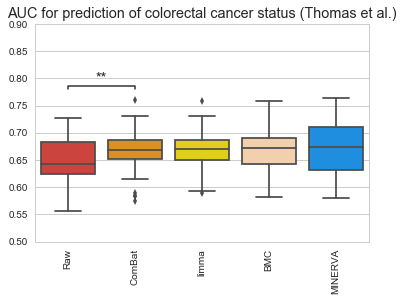

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")


x = "Method"
y = "AUC"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df_metric,palette=plot_color)
sns.set_context("paper", font_scale=1.5) 
sns.set_style("whitegrid")
if pair_test_all:
    if shortened:
        if shortened_shortened:
            add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[2], df_metric.columns[3])],
                        test='t-test_ind', text_format='star', loc='outside', verbose=2)
        else:
            if key == 'Gibbons':
                add_stat_annotation(ax, data=df_metric,
                            box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                      (df_metric.columns[0], df_metric.columns[2]),
                                      (df_metric.columns[0], df_metric.columns[3]),
                                      (df_metric.columns[0], df_metric.columns[4]),
                                       (df_metric.columns[1], df_metric.columns[4])],
                            test='t-test_ind', text_format='star', loc='outside', verbose=2)
            else:
                add_stat_annotation(ax, data=df_metric,
                            box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                      (df_metric.columns[0], df_metric.columns[2]),
                                      (df_metric.columns[0], df_metric.columns[3]),
                                      (df_metric.columns[0], df_metric.columns[4])],
                            test='t-test_ind', text_format='star', loc='outside', verbose=2)

    else:
        add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[0], df_metric.columns[4]),
                                  (df_metric.columns[0], df_metric.columns[5]),
                                  (df_metric.columns[0], df_metric.columns[6])],
                        test='t-test_ind', text_format='star', loc='outside', verbose=2)

else:
    add_stat_annotation(ax, data=df_metric,
                    box_pairs=[(df_metric.columns[0], df_metric.columns[1])],
                    test='t-test_paired', text_format='star', loc='outside', verbose=2)
# , (df_metric.columns[0], df_metric.columns[5])
if not_rotate:
    ax.set_xticklabels(labels = select_labels)
else:
    ax.set_xticklabels(rotation=90,labels = select_labels)
ax.set(ylim=limit_spec)
ax.set_title(title)
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '_2.pdf',bbox_inches='tight')
#(df_metric.columns[0], df_metric.columns[2]),
#                              (df_metric.columns[0], df_metric.columns[3]),
#                             (df_metric.columns[0], df_metric.columns[4]),
#                             (df_metric.columns[0], df_metric.columns[5])

In [16]:
np.mean(df_metric.sum(axis=0))

33.28794551535403

In [17]:
np.mean(np.array(df_metric.sum(axis=0)))

33.28794551535403

In [18]:
test = df_metric.sum(axis=0)
        
    
    
    

In [19]:
test

Thomas_k7raw_grid_trans_none             32.501687
Thomas_k6ComBat_grid_trans_none          33.326780
Thomas_k6limma_grid_trans_none           33.404623
Thomas_k6bmc_grid_trans_none             33.470287
Thomas_k7MINERVA_grid_trans_clr_scale    33.736350
dtype: float64

In [20]:
sum(np.isnan(df_metric.sum(axis=0)))

0